# 🤖 Creación de los modelos - Factores de anemia

- Miguel Angel Vélez Suarez
- Samuel Pérez Hurtado

1. Importar los datos preparados
2. División 70-30
3. Aprendizaje de los modelos y evaluación
4. Hiperparametrización de los 3 mejores modelos

In [1]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica
import pickle # guardar modelos

# 1. Importar los datos

In [2]:
data = pd.read_csv('data/datos_preparados.csv')
data.head()

,Age in 5-year groups,Type of place of residence,Wealth index combined,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,When child put to breast,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup"
0,25-29,Urban,Richest,95.0,Moderate,Yes,No,105.000000,No,No
1,30-34,Urban,Richest,113.0,Mild,Yes,No,51.335329,No,No
2,35-39,Urban,Richest,121.0,Not anemic,Yes,No,0.000000,No,Yes
3,35-39,Urban,Richest,121.0,Not anemic,Yes,No,51.335329,No,No
4,20-24,Urban,Richest,108.0,Moderate,Yes,No,0.000000,No,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13136 entries, 0 to 13135
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   13136 non-null  object 
 1   Type of place of residence                                             13136 non-null  object 
 2   Wealth index combined                                                  13136 non-null  object 
 3   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  13136 non-null  float64
 4   Anemia level                                                           13136 non-null  object 
 5   Have mosquito bed net for sleeping (from household questionnaire)      13136 non-null  object 
 6   Smokes cigarettes                                                      13136 non-null 

In [4]:
# Encoder: Transformación de categorías a números (sólo para la variable objetivo)
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data["Anemia level"] = labelencoder.fit_transform(data["Anemia level"])
data.head()

,Age in 5-year groups,Type of place of residence,Wealth index combined,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,When child put to breast,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup"
0,25-29,Urban,Richest,95.0,1,Yes,No,105.000000,No,No
1,30-34,Urban,Richest,113.0,0,Yes,No,51.335329,No,No
2,35-39,Urban,Richest,121.0,2,Yes,No,0.000000,No,Yes
3,35-39,Urban,Richest,121.0,2,Yes,No,51.335329,No,No
4,20-24,Urban,Richest,108.0,1,Yes,No,0.000000,No,Yes


# 2. División 70-30

<Axes: xlabel='Anemia level'>

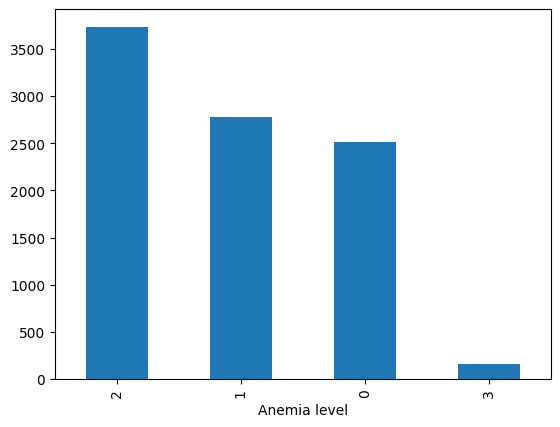

In [5]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("Anemia level", axis = 1) # Variables predictoras
Y = data['Anemia level'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')# Objetivo del 70%

## 2.1. Balanceo del 70%

In [6]:
!pip install imblearn

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9195 entries, 9143 to 12976
Data columns (total 9 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   9195 non-null   object 
 1   Type of place of residence                                             9195 non-null   object 
 2   Wealth index combined                                                  9195 non-null   object 
 3   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  9195 non-null   float64
 4   Have mosquito bed net for sleeping (from household questionnaire)      9195 non-null   object 
 5   Smokes cigarettes                                                      9195 non-null   object 
 6   When child put to breast                                               9195 non-null   flo

In [8]:
from imblearn.over_sampling import SMOTENC

# Identificar las columnas categóricas y numéricas
categorical_cols = ['Age in 5-year groups', 'Type of place of residence', 'Wealth index combined', 
                    'Have mosquito bed net for sleeping (from household questionnaire)', 'Smokes cigarettes', 
                    'Had fever in last two weeks', 'Taking iron pills, sprinkles or syrup']
numerical_cols = ['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']

# Crear una lista de booleanos para indicar si una columna es categórica (True) o no (False)
categorical_features = [True if col in categorical_cols else False for col in X_train.columns]

# Usar SMOTENC para balancear las variables categóricas y numéricas
sm = SMOTENC(categorical_features=categorical_features, random_state=42, k_neighbors=2)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

<Axes: xlabel='Anemia level'>

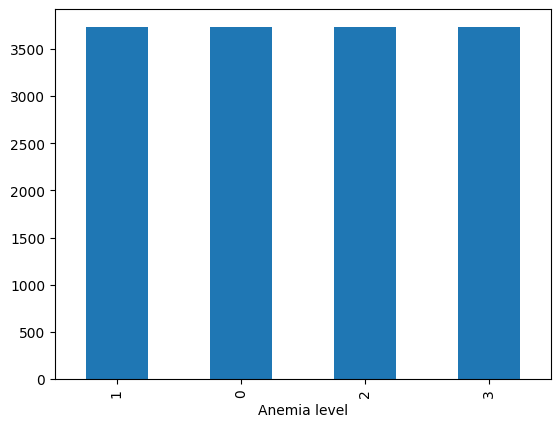

In [9]:
Y_train.value_counts().plot(kind='bar')

<Axes: xlabel='Anemia level'>

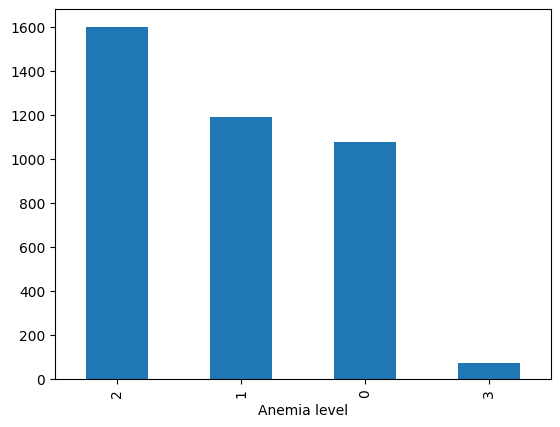

In [10]:
Y_test.value_counts().plot(kind='bar')

## 2.2. Dummies

In [11]:
X_train = pd.get_dummies(X_train, drop_first=True, dtype='int64')
X_test = pd.get_dummies(X_test, drop_first=True, dtype='int64')

In [12]:
X_train.head()

,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),When child put to breast,Age in 5-year groups_20-24,Age in 5-year groups_25-29,Age in 5-year groups_30-34,Age in 5-year groups_35-39,Age in 5-year groups_40-44,Age in 5-year groups_45-49,Type of place of residence_Urban,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Have mosquito bed net for sleeping (from household questionnaire)_Yes,Smokes cigarettes_Yes,Had fever in last two weeks_No,Had fever in last two weeks_Yes,"Taking iron pills, sprinkles or syrup_No","Taking iron pills, sprinkles or syrup_Yes"
0,95.0,0.000000,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
1,110.0,51.335329,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0
2,116.0,102.000000,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0
3,111.0,51.335329,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
4,129.0,102.000000,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0


In [13]:
X_test.head()

,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),When child put to breast,Age in 5-year groups_20-24,Age in 5-year groups_25-29,Age in 5-year groups_30-34,Age in 5-year groups_35-39,Age in 5-year groups_40-44,Age in 5-year groups_45-49,Type of place of residence_Urban,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Have mosquito bed net for sleeping (from household questionnaire)_Yes,Smokes cigarettes_Yes,Had fever in last two weeks_No,Had fever in last two weeks_Yes,"Taking iron pills, sprinkles or syrup_No","Taking iron pills, sprinkles or syrup_Yes"
5944,141.0,51.335329,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
12250,130.0,51.335329,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
11157,95.0,103.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6150,95.0,60.000000,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
4506,120.0,51.335329,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


# 3. Aprendizaje de los modelos y evaluación

- Árbol de decisión
- KNN
- Redes neuronales
- SVM
- Random Forest
- XGBoost
- Stacking

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns

def evaluacion_modelos(model, X_test, y_test):

    y_test_pred = model.predict(X_test)  #Estas son las salidas generadas por el modelo (TEÓRICAS)

    print("******* Resultados de evaluación*******")

    clf_report = pd.DataFrame(classification_report(y_test,y_test_pred,output_dict=True))

    conf = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(conf, annot=True, fmt='d')
    
    precision = precision_score(y_test, y_test_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_test_pred, average='weighted')
    exactitud = accuracy_score(y_test, y_test_pred)
    f1score = f1_score(y_test, y_test_pred, average='weighted')

    print(f"Precisión: {precision}")
    print(f"Sensibilidad: {sensibilidad}")
    print(f"Exactitud: {exactitud}")
    print(f"F1_Score: {f1score}")

    print(clf_report)
    
    return precision, sensibilidad, exactitud, f1score

## 3.1. Árbol de decisión

In [15]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=10) #gini, entropy

scores = cross_validate(modelTree, X_train, Y_train, cv=10, scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'), 
                        return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores)
scores

,fit_time,score_time,test_f1_weighted,test_accuracy,test_precision_weighted,test_recall_weighted
0,0.022106,0.007668,0.937360,0.937124,0.939673,0.937124
1,0.027048,0.010184,0.942950,0.943144,0.944997,0.943144
2,0.020415,0.007102,0.952477,0.952508,0.953600,0.952508
3,0.021464,0.012275,0.951231,0.951171,0.952294,0.951171
4,0.020262,0.007088,0.943911,0.943775,0.945844,0.943775
5,0.020086,0.007012,0.941813,0.941767,0.943367,0.941767
6,0.019288,0.007024,0.937410,0.937751,0.939585,0.937751
7,0.019598,0.007204,0.957130,0.957162,0.958588,0.957162
8,0.022204,0.009076,0.947908,0.947791,0.949288,0.947791
9,0.025400,0.011288,0.949927,0.949799,0.950524,0.949799


In [16]:
# Calcular los valores promedio de cada métrica
promedio_f1 = scores['test_f1_weighted'].mean()
promedio_accuracy = scores['test_accuracy'].mean()
promedio_precision = scores['test_precision_weighted'].mean()
promedio_recall = scores['test_recall_weighted'].mean()

# Imprimir los valores promedio
print("Promedio F1 Score: {:.2f}".format(promedio_f1))
print("Promedio Accuracy: {:.2f}".format(promedio_accuracy))
print("Promedio Precision: {:.2f}".format(promedio_precision))
print("Promedio Recall: {:.2f}".format(promedio_recall))

Promedio F1 Score: 0.95
Promedio Accuracy: 0.95
Promedio Precision: 0.95
Promedio Recall: 0.95


In [17]:
# Entrenamiento del modelo con el 70%
modelTree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

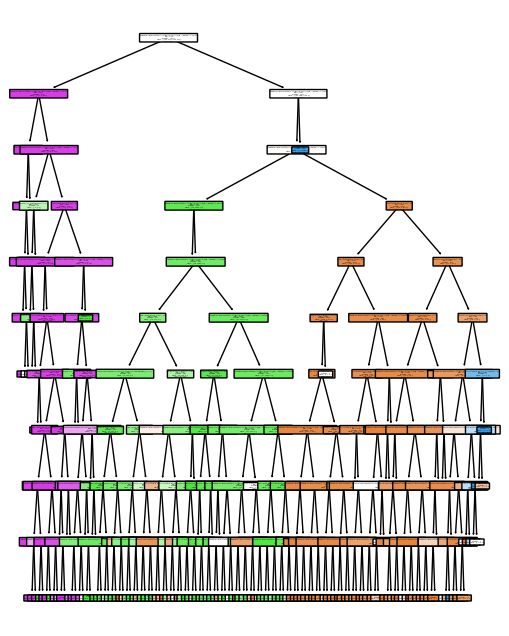

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(6,8))
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

******* Resultados de evaluación*******
Precisión: 0.9266265878314378
Sensibilidad: 0.9236234458259325
Exactitud: 0.9236234458259325
F1_Score: 0.9239675087516295
                     0            1            2          3  accuracy  \
precision     0.874528     0.884323     0.995984   0.863014  0.923623   
recall        0.859926     0.974832     0.929419   0.900000  0.923623   
f1-score      0.867166     0.927374     0.961551   0.881119  0.923623   
support    1078.000000  1192.000000  1601.000000  70.000000  0.923623   

             macro avg  weighted avg  
precision     0.904462      0.926627  
recall        0.916044      0.923623  
f1-score      0.909302      0.923968  
support    3941.000000   3941.000000  


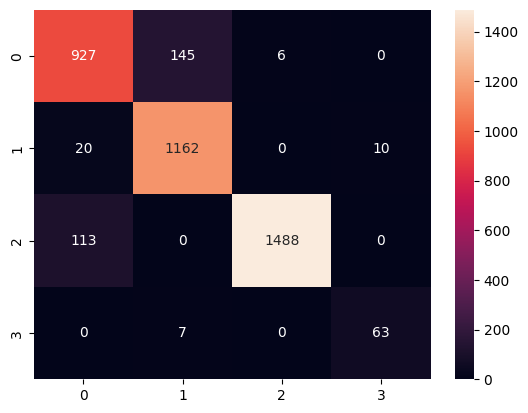

In [19]:
precision, sensibilidad, exactitud, f1score = evaluacion_modelos(modelTree, X_test, Y_test)

medidas = pd.DataFrame(index=['Precisión', 'Sensibilidad', 'Exactitud', 'F1_Score'])
medidas['DecisionTree'] = [precision, sensibilidad, exactitud, f1score]

In [20]:
medidas

,DecisionTree
Precisión,0.926627
Sensibilidad,0.923623
Exactitud,0.923623
F1_Score,0.923968


## 3.2. KNN

In [21]:
# Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']])

#Se aplica la normalización al 70% y 30%
X_train[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']]= min_max_scaler.transform(X_train[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']])
X_test[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']]= min_max_scaler.transform(X_test[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']])
X_train.head()

,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),When child put to breast,Age in 5-year groups_20-24,Age in 5-year groups_25-29,Age in 5-year groups_30-34,Age in 5-year groups_35-39,Age in 5-year groups_40-44,Age in 5-year groups_45-49,Type of place of residence_Urban,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Have mosquito bed net for sleeping (from household questionnaire)_Yes,Smokes cigarettes_Yes,Had fever in last two weeks_No,Had fever in last two weeks_Yes,"Taking iron pills, sprinkles or syrup_No","Taking iron pills, sprinkles or syrup_Yes"
0,0.535714,0.000000,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
1,0.642857,0.230203,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0
2,0.685714,0.457399,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0
3,0.650000,0.230203,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
4,0.778571,0.457399,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0


In [22]:
#Aprendizaje KNN con 70%
from sklearn.neighbors  import KNeighborsClassifier
modelKnn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')#euclidean, minkowski

scores = cross_validate(modelKnn, X_train, Y_train, cv=10, scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'), 
                        return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores)
scores

,fit_time,score_time,test_f1_weighted,test_accuracy,test_precision_weighted,test_recall_weighted
0,0.005708,0.105891,0.790609,0.789298,0.794461,0.789298
1,0.006096,0.103938,0.817752,0.816722,0.822299,0.816722
2,0.005826,0.100588,0.817259,0.816722,0.822033,0.816722
3,0.005957,0.099522,0.813725,0.812709,0.817906,0.812709
4,0.006096,0.099222,0.825888,0.824632,0.831863,0.824632
5,0.006108,0.107090,0.821950,0.819946,0.827142,0.819946
6,0.006212,0.100817,0.833775,0.832664,0.839665,0.832664
7,0.006165,0.097779,0.885578,0.884873,0.894629,0.884873
8,0.006083,0.098425,0.891638,0.891566,0.899685,0.891566
9,0.005953,0.097465,0.888319,0.887550,0.896663,0.887550


In [23]:
# Calcular los valores promedio de cada métrica
promedio_f1 = scores['test_f1_weighted'].mean()
promedio_accuracy = scores['test_accuracy'].mean()
promedio_precision = scores['test_precision_weighted'].mean()
promedio_recall = scores['test_recall_weighted'].mean()

# Imprimir los valores promedio
print("Promedio F1 Score: {:.2f}".format(promedio_f1))
print("Promedio Accuracy: {:.2f}".format(promedio_accuracy))
print("Promedio Precision: {:.2f}".format(promedio_precision))
print("Promedio Recall: {:.2f}".format(promedio_recall))

Promedio F1 Score: 0.84
Promedio Accuracy: 0.84
Promedio Precision: 0.84
Promedio Recall: 0.84


In [24]:
# Entrenamiento del modelo con el 70%
modelKnn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

******* Resultados de evaluación*******
Precisión: 0.7478905276158334
Sensibilidad: 0.7292565338746511
Exactitud: 0.7292565338746511
F1_Score: 0.7346625341249801
                     0            1            2          3  accuracy  \
precision     0.563971     0.756164     0.875702   0.516129  0.729257   
recall        0.711503     0.694631     0.778888   0.457143  0.729257   
f1-score      0.629204     0.724093     0.824463   0.484848  0.729257   
support    1078.000000  1192.000000  1601.000000  70.000000  0.729257   

             macro avg  weighted avg  
precision     0.677992      0.747891  
recall        0.660541      0.729257  
f1-score      0.665652      0.734663  
support    3941.000000   3941.000000  


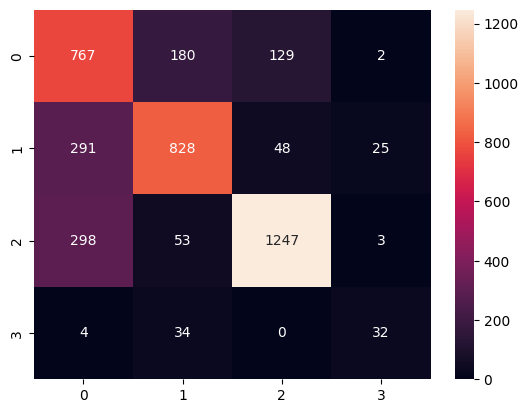

In [25]:
precision, sensibilidad, exactitud, f1score = evaluacion_modelos(modelKnn, X_test, Y_test)

medidas['KNN'] = [precision, sensibilidad, exactitud, f1score]

In [26]:
medidas

,DecisionTree,KNN
Precisión,0.926627,0.747891
Sensibilidad,0.923623,0.729257
Exactitud,0.923623,0.729257
F1_Score,0.923968,0.734663


## 3.3. Redes neuronales

In [ ]:
#Red Neuronal
from sklearn.neural_network import MLPClassifier

#Solo se configura capas ocultas, no se configura capa de entrada y de salida
modelNN = MLPClassifier(activation="logistic",hidden_layer_sizes=(5), learning_rate='constant',
                        learning_rate_init=0.2, momentum= 0.3, max_iter=500, random_state=42)

scores = cross_validate(modelNN, X_train, Y_train, cv=10, scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'), 
                        return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores)
scores

In [ ]:
# Calcular los valores promedio de cada métrica
promedio_f1 = scores['test_f1_weighted'].mean()
promedio_accuracy = scores['test_accuracy'].mean()
promedio_precision = scores['test_precision_weighted'].mean()
promedio_recall = scores['test_recall_weighted'].mean()

# Imprimir los valores promedio
print("Promedio F1 Score: {:.2f}".format(promedio_f1))
print("Promedio Accuracy: {:.2f}".format(promedio_accuracy))
print("Promedio Precision: {:.2f}".format(promedio_precision))
print("Promedio Recall: {:.2f}".format(promedio_recall))

In [ ]:
# Entrenamiento del modelo con el 70%
modelNN.fit(X_train, Y_train)

In [ ]:
precision, sensibilidad, exactitud, f1score = evaluacion_modelos(modelNN, X_test, Y_test)

medidas['Red Neuronal'] = [precision, sensibilidad, exactitud, f1score]

## 3.4. SVM

In [ ]:
#SVM
from sklearn.svm import SVC #Classifier
modelSVM = SVC(kernel='linear') #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

scores = cross_validate(modelSVM, X_train, Y_train, cv=10, scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'), 
                        return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores)
scores

In [ ]:
# Calcular los valores promedio de cada métrica
promedio_f1 = scores['test_f1_weighted'].mean()
promedio_accuracy = scores['test_accuracy'].mean()
promedio_precision = scores['test_precision_weighted'].mean()
promedio_recall = scores['test_recall_weighted'].mean()

# Imprimir los valores promedio
print("Promedio F1 Score: {:.2f}".format(promedio_f1))
print("Promedio Accuracy: {:.2f}".format(promedio_accuracy))
print("Promedio Precision: {:.2f}".format(promedio_precision))
print("Promedio Recall: {:.2f}".format(promedio_recall))

In [ ]:
# Entrenamiento del modelo con el 70%
modelSVM.fit(X_train, Y_train)

In [ ]:
precision, sensibilidad, exactitud, f1score = evaluacion_modelos(modelSVM, X_test, Y_test)

medidas['SVM'] = [precision, sensibilidad, exactitud, f1score]

## 3.5. Random Forest

# 4. Hiperparametrización de los 3 mejores modelos